In [61]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import csv
import pickle
import matplotlib.pyplot as plt

path='data/'

In [62]:
def load_node_to_class(data_path, node_to_class_file):
    with open(data_path + node_to_class_file + '.pkl', 'rb') as f:
        d_node_to_class = pickle.load(f)
    print('load_node_to_class| __d_node_to_class: {}'.format(len(d_node_to_class)))
    return d_node_to_class

In [63]:
d_n_c = load_node_to_class('data/', 'dict_node_to_class')
# d_n_c

load_node_to_class| __d_node_to_class: 212557


In [64]:
def hist_array(a, title='Histogram of ppi frequency', bins='auto'):
    
    print('__hist_array| min: {}, max: {}'.format(np.min(a), np.max(a)))
    _ = plt.hist(a, bins=bins)  # arguments are passed to np.histogram
    plt.title(title)

    plt.show()
    
def scatter(x,y, title, figsize=(7,7), reg=True):


    fig = plt.figure(figsize =(10,10))
    
    plt.scatter(x, y)

    plt.title("scatter of {} ".format(title))
#     plt.ylabel("log of frequency")
#     plt.xlabel("log of Degree")
    # ax.set_xticks([d + 0.4 for d in deg])
    # ax.set_xticklabels(deg)
    plt.show()
    
def read_symbols_walks(path, walk_file_name, d_n_c):
    dict_patt = dict()
    pat_set = set()
    max_len = 0 
    for line in tqdm(open(path + walk_file_name, 'r')):
        w = line.strip().split(' ')
        w = np.array(w, dtype=object) 
        if len(w) > max_len:
            max_len = len(w)
        symbols = [d_n_c[int(i[1:])] for i in w ]
        st = 0

        for i in range(len(symbols)):
            if symbols[i] == 'Pathway':
                pat = symbols[st:i+1]
                st = i+1
                
                t = tuple(pat)
                if t not in dict_patt:
                    dict_patt[t] = 0
                
                dict_patt[t]+=1
                
                pat_set.add(tuple(t))
#                 print(pat_set)
    print('Maximum Length: {}'.format(max_len))
    patts_list = list(pat_set)
    patts_list.sort(key=len)
    return patts_list, dict_patt

In [65]:
walk_file_all = 'walks-pro-x-pro-path-40-40-graphpattern2vec-biased-v4_ALL-vCH_br'
patts_all, d_patts_all = read_symbols_walks(path, walk_file_all, d_n_c)
len(patts_all)

6786400it [02:12, 51392.76it/s] 

Maximum Length: 41


30

In [67]:
for ch in patts_all:
    print(ch)

('Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'PTM', 'Protein', 'Pathway')
('Protein', 'FD', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'MF', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'MF', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'PTM', 'Protein', 'PTM', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'MF', 'Protein', 'PTM', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'FD', 'Protein', 'Pathway')
('Protein', 'PTM', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'FD', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'FD', 'Protein', 'Pathway

In [51]:
dict_len_to_patt_all = dict()
for p in patts_all:
    l = len(p)
    if l not in dict_len_to_patt_all:
        dict_len_to_patt_all[l] = list()
    dict_len_to_patt_all[l].append(p)
len(dict_len_to_patt_all)

19

In [55]:
dict_len_to_instances = dict()
for p in d_patts_all:
    l = len(p)
    if l not in dict_len_to_instances:
        dict_len_to_instances[l] = 0
    dict_len_to_instances[l]+=d_patts_all[p]
dict_len_to_instances

{4: 6265186,
 6: 35533925,
 8: 125645,
 7: 896710,
 9: 28334,
 5: 499797,
 10: 8563,
 11: 3011,
 12: 1218,
 13: 527,
 14: 182,
 17: 27,
 16: 55,
 18: 17,
 15: 101,
 19: 10,
 21: 3,
 25: 1,
 20: 5}

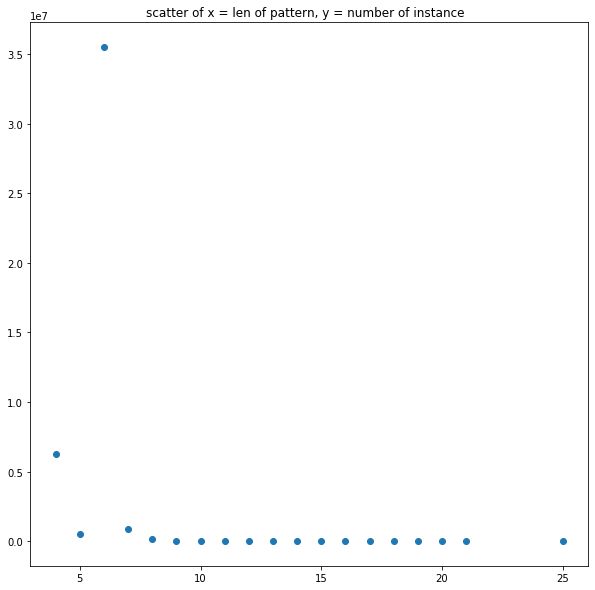

In [60]:
x, y = np.array(list(dict_len_to_instances.keys())), np.array(list(dict_len_to_instances.values()))
scatter(x, y, 'x = len of pattern, y = number of instance ')


In [17]:
# freq_patterns = list(d_patts_all.values())
# hist_array(freq_patterns)

In [16]:
# l = list(d_patts_all.values())
# hist_array(l)

#### Filter walks based on patterns length

In [38]:

def read_symbols_walks(path, walk_file_name, d_n_c):
    dict_patt = dict()
    pat_set = set()
    max_len = 0 
    for line in open(path + walk_file_name, 'r'):
        w = line.strip().split(' ')
        w = np.array(w, dtype=object) 
        if len(w) > max_len:
            max_len = len(w)
        symbols = [d_n_c[int(i[1:])] for i in w ]
        print(symbols)
        indices = [i for i, x in enumerate(symbols) if x == "Pathway"]
        print(indices)
        
        lens = list()
        st = 0 
        print(len(symbols))
        for i in range(len(symbols)):
            if i in indices:
                l = i-st+1
                st = i+1
                lens.append(l)
        print(lens)
        print(sum(lens))      
        
        print(sdfasd)
                
                
                
    print('Maximum Length: {}'.format(max_len))
    patts_list = list(pat_set)
    patts_list.sort(key=len)
    return patts_list, dict_patt

In [39]:
dict_len_to_patt_all.keys()

dict_keys([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25])

In [40]:
walk_file_all = 'walks-pro-x-pro-path-40-40-graphpattern2vec-biased-v4_ALL1'
patts_all, d_patts_all = read_symbols_walks(path, walk_file_all, d_n_c)
len(patts_all)

['Protein', 'BP', 'Protein', 'Pathway', 'Protein', 'BP', 'Protein', 'FD', 'Protein', 'Pathway', 'Protein', 'FD', 'Protein', 'FD', 'Protein', 'Pathway', 'Protein', 'BP', 'Protein', 'BP', 'Protein', 'Pathway', 'Protein', 'FD', 'Protein', 'MF', 'Protein', 'Pathway', 'Protein', 'FD', 'Protein', 'FD', 'Protein', 'Pathway', 'Protein', 'FD', 'Protein', 'FD', 'Protein', 'Pathway', 'Protein']
[3, 9, 15, 21, 27, 33, 39]
41
[4, 6, 6, 6, 6, 6, 6]
40


NameError: name 'sdfasd' is not defined

## ALL-vCH

In [18]:
walk_file_ch_all = 'walks-pro-x-pro-path-40-40-graphpattern2vec-biased-v4_ALL-vCH'
patts_ch_all = read_symbols_walks(path, walk_file_ch_all, d_n_c)
len(patts_ch_all)

6786400it [01:59, 56770.58it/s] 

Maximum Length: 41


166

In [19]:
for ch in patts_ch_all:
    print(ch)

('Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'PTM', 'Protein', 'Pathway')
('Protein', 'FD', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'FD', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'PTM', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'FD', 'Protein', 'FD', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'MF', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'FD', 'Protein', 'PTM', 'Protein', 'Pathway')
('Protein', 'FD', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'PTM', 'Protein', 'Pathway')
('Protein', 'PTM', 'Protein', 'FD', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'PTM', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'MF', 'Protein', 'MF', 'Protein', 'Pathwa

In [23]:
f_ch_i_all = set()
f_ch_ni_all = set()
for i in patts_ch_all:
    if i in patts_all:
        f_ch_i_all.add(i)
    else:
        f_ch_ni_all.add(i)
        
print(len(f_ch_i_all)/len(patts_ch_all), len(f_ch_ni_all)/len(patts_ch_all))
for i in f_ch_ni_all:
    print(i)

0.9578313253012049 0.04216867469879518
('Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'CC', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'FD', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'FD', 'Protein', 'PTM', 'Protein', 'Pathway')
('Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'CC', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'FD', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'Protein', 'CC', 'Protein', 'FD', 'Protein', 'P

In [28]:
f_all_i_ch = set()
f_all_ni_ch = set()
for i in patts_all:
    if i in patts_ch_all:
        f_all_i_ch.add(i)
    else:
        f_all_ni_ch.add(i)
        
print(len(f_all_i_ch)/len(patts_all), len(f_all_ni_ch)/len(patts_all))
# for i in f_ch_ni_all:
#     print(i)
len(f_all_ni_ch)
list(f_all_ni_ch)[:3]

0.24311926605504589 0.7568807339449541


[('Protein',
  'Protein',
  'Protein',
  'MF',
  'Protein',
  'Protein',
  'CC',
  'Protein',
  'Pathway'),
 ('Protein',
  'Protein',
  'CC',
  'Protein',
  'Protein',
  'Protein',
  'MF',
  'Protein',
  'Pathway'),
 ('Protein',
  'Protein',
  'Protein',
  'Protein',
  'Protein',
  'Protein',
  'Protein',
  'Protein',
  'Protein',
  'Protein',
  'Protein',
  'Protein',
  'MF',
  'Protein',
  'BP',
  'Protein',
  'Pathway')]

In [ ]:
('v', 'f', 'v', 'a')
('v', 'f', 'v', 'f', 'v', 'a')
('v', 'v', 'f', 'v', 'f', 'v', 'a')
('v', 'v', 'v', 'f', 'v', 'f', 'v', 'a')
('v', 'v', 'v', 'v', 'f', 'v', 'f', 'v', 'a')
('v', 'v', 'v', 'v', 'v', 'f', 'v', 'f', 'v', 'a')
('v', 'v', 'v', 'v', 'v', 'v', 'f', 'v', 'f', 'v', 'a')
('v', 'v', 'v', 'v', 'v', 'v', 'v', 'f', 'v', 'f', 'v', 'a')
('v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'f', 'v', 'f', 'v', 'a')
('v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'f', 'v', 'f', 'v', 'a')

In [13]:
walk_file_BPCCMF = 'walks-pro-x-pro-path-40-40-graphpattern2vec-biased-v4_BP1-CC1-MF2-v2'
patts_BPCCMF= read_symbols_walks(path, walk_file_BPCCMF, d_n_c)
len(patts_BPCCMF)

4823320it [00:53, 90727.55it/s]

Maximum Length: 41


12

In [14]:
for ch in patts_BPCCMF:
    print(ch)

('Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'MF', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'MF', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'CC', 'Protein', 'BP', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'CC', 'Protein', 'Pathway')
('Protein', 'BP', 'Protein', 'MF', 'Protein', 'Pathway')
('Protein', 'MF', 'Protein', 'BP', 'Protein', 'Pathway')


In [17]:
walk_file_BPCCMF_vCH = 'walks-pro-x-pro-path-40-40-graphpattern2vec-biased-v4_BP1-CC1-MF2-vCH'
patts_BPCCMF_vCH= read_symbols_walks(path, walk_file_BPCCMF_vCH, d_n_c)
len(patts_BPCCMF_vCH)

4823320it [00:52, 91847.56it/s]

Maximum Length: 41


12

In [ ]:
walk_file_BP = 'walks-pro-x-pro-path-40-40-graphpattern2vec-biased-v4_BP1-v2'
patts_BP= read_symbols_walks(path, walk_file_BP, d_n_c)
len(patts_BP), patts_BP

In [15]:
walk_file_FD = 'walks-pro-x-pro-path-40-40-graphpattern2vec-biased-v4_FD1'
patts_FD= read_symbols_walks(path, walk_file_FD, d_n_c)
len(patts_FD)

5762280it [01:45, 54369.79it/s]

Maximum Length: 41


2

In [16]:
patts_FD

[('Protein', 'FD', 'Protein', 'Pathway'),
 ('Protein', 'FD', 'Protein', 'FD', 'Protein', 'Pathway')]